# Feature scaling
## What is?
It is a technique for increment the performance of gradient descent. 
Let's start by taking a look at the relationship between the size of a feature
and the size of its associated parameter.
### Example
$$
    \hat{price} = w_{1}x_{1} + w_{2}x_{2} + b
$$
where:
* $x_{1}$: size ($feet^2$) range: 300 - 2000
* $x_{2}$: number of bedrooms range: 0 - 5
You might notice that when a possible range of values of a feature is large, like the size. It's more likely that a good model will learn to choose a relatively small parameter value. When the possible values of the feature are small, like the number of bedrooms then a reasonable value for its parameters will be relatively large.
### How does this relate with gradient descent?
Gradient descent may end up bouncing back and forth for a long time before it can finally find its way to the global minimum.
**A usefull thing to do is to scale the features**. Doing this will cause that gradient descent can find a much more direct path to the minumum.
## How can implement feature scaling?
### First way
$$
    300 \leq x_{1} \leq 2000
$$
then
$$
    x_{1, scaled} = \frac{x_{1}}{2000}
$$
now
$$
    0.15 \leq x_{1, scaled} \leq 1
$$
### Second way **(Mean normalization)**
For each feature $x$ the scaled version is:
$$
    x = \frac{x - \mu}{max - min}
$$
where $\mu$ is the avarage of the feature.
### Third way **(Z-score normalization)**
In this way, we have to use standard deviation $\sigma$ of the feature and alse we need to use the avarage $\mu$. Now for each feature $x$ the scaled version of the feature is:
$$
    x = \frac{x - \mu}{\sigma}
$$


# Checking gradient descent for convergence
## Make a graph
We can use a graph iterations agains $J\left(\vec{w}, b\right)$.
## Automatic convergence test 
Let $\varepsilon$ be a very small number. If $J\left(\vec{w}, b\right)$ decreases by $\leq \varepsilon$ in one iteration declare **convergence**.


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('data_set/second_data_set/Cellphone.csv')
dataset.head(10) # Show the first ten registers.

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
5,947,2137,12,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
6,774,1238,13,134.1,4.0,233,2,1.20,8.0,1.000,2.00,0.0,1560,11.7
7,947,2137,13,150.0,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,9.5
8,99,1315,14,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
9,1103,2580,15,145.0,5.1,432,4,2.50,16.0,2.000,16.00,2.0,2800,8.1


In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [29]:
features_x = ['Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery', 'thickness']
x = dataset[features_x]
y = dataset['Price']
vec_x = x.to_numpy() # Convert data frame into numpy matrix
actual_y = y.to_numpy() # Convert data frame into numpy matrix
m = vec_x.shape[0] # number of samples
n = vec_x.shape[1] # number of features

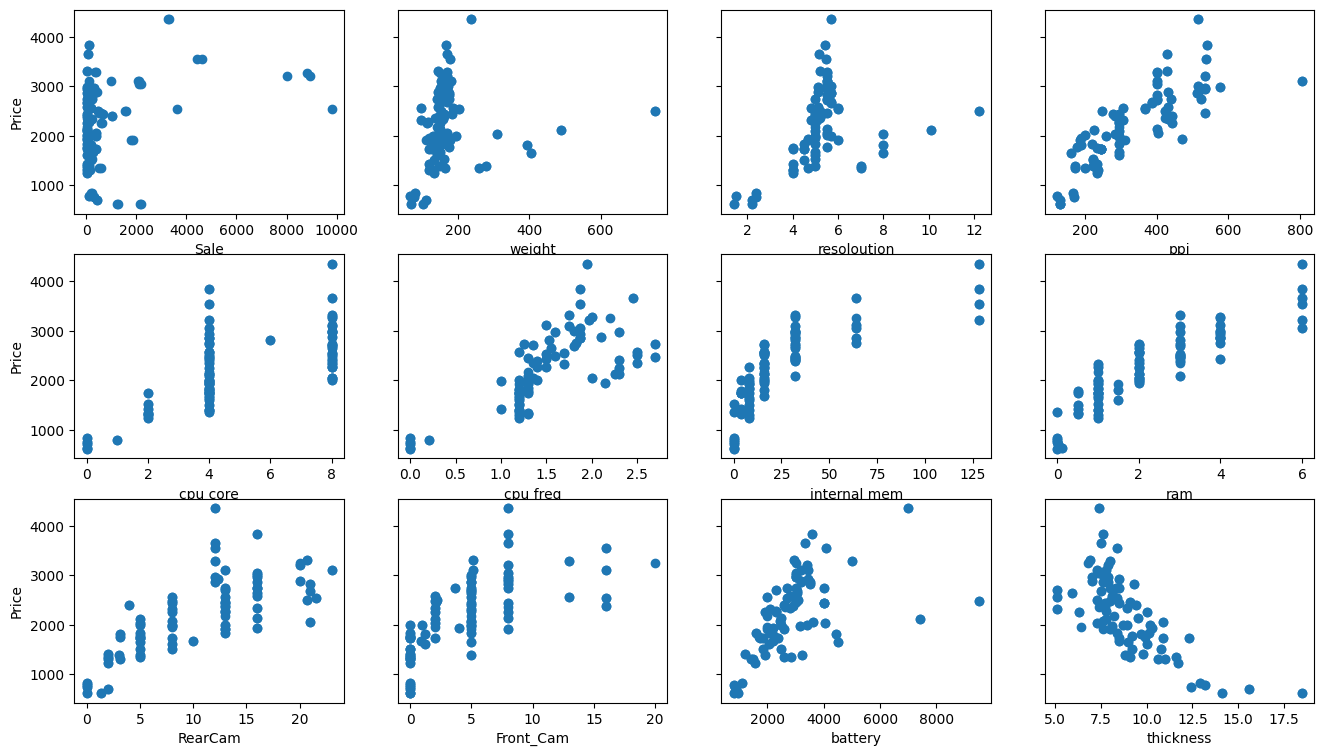

In [38]:
fig,ax = plt.subplots(3, 4, figsize=(16, 9), sharey=True)
c = 0
for i in range(3):
    for j in range(4):
        feature = features_x[c]
        c += 1
        actual_x = x[feature].to_numpy()
        ax[i][j].scatter(actual_x, actual_y)
        ax[i][j].set_xlabel(feature)
ax[0][0].set_ylabel("Price")
ax[1][0].set_ylabel("Price")
ax[2][0].set_ylabel("Price")
plt.show()

In [ ]:
def model(X, w, b):
    return np.dot(X, w) + b

def error(X, Y, w, b):
    return model(X, w, b) - Y

def partial_derivative_of_w(X, Y, w_init, b):
    m, n = X.shape
    w = np.zeros((n, ))
    for i in range(n):
        w[i] = (1 / m) * np.dot(error(X, Y, w_init, b), X[:, i])
    return w

def partial_derivative_of_b(X, Y, w, b):
    return (1 / m) * np.sum(error(X, Y, w, b))
    

def gradient_descent_with_multiple_variables(X, Y, num_iter):
    alpha = 0.000000001
    w = np.zeros((n, ))
    b = 0
    for i in range(num_iter):
        temp_w = w - alpha * partial_derivative_of_w(vec_x, actual_y, w, b)
        temp_b = b - alpha * partial_derivative_of_b(vec_x, actual_y, w, b)
        w = temp_w
        b = temp_b
    return (w, b)

In [45]:
def zscore_normalization(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return (X_norm, mu, sigma)

X_norm, mu, sigma = zscore_normalization(vec_x)

array([1.54180787e+03, 9.25996891e+01, 1.50525642e+00, 1.34407291e+02,
       2.43641408e+00, 5.97917122e-01, 2.87151776e+01, 1.60482416e+00,
       6.16235764e+00, 4.32854777e+00, 1.36273891e+03, 2.18574420e+00])

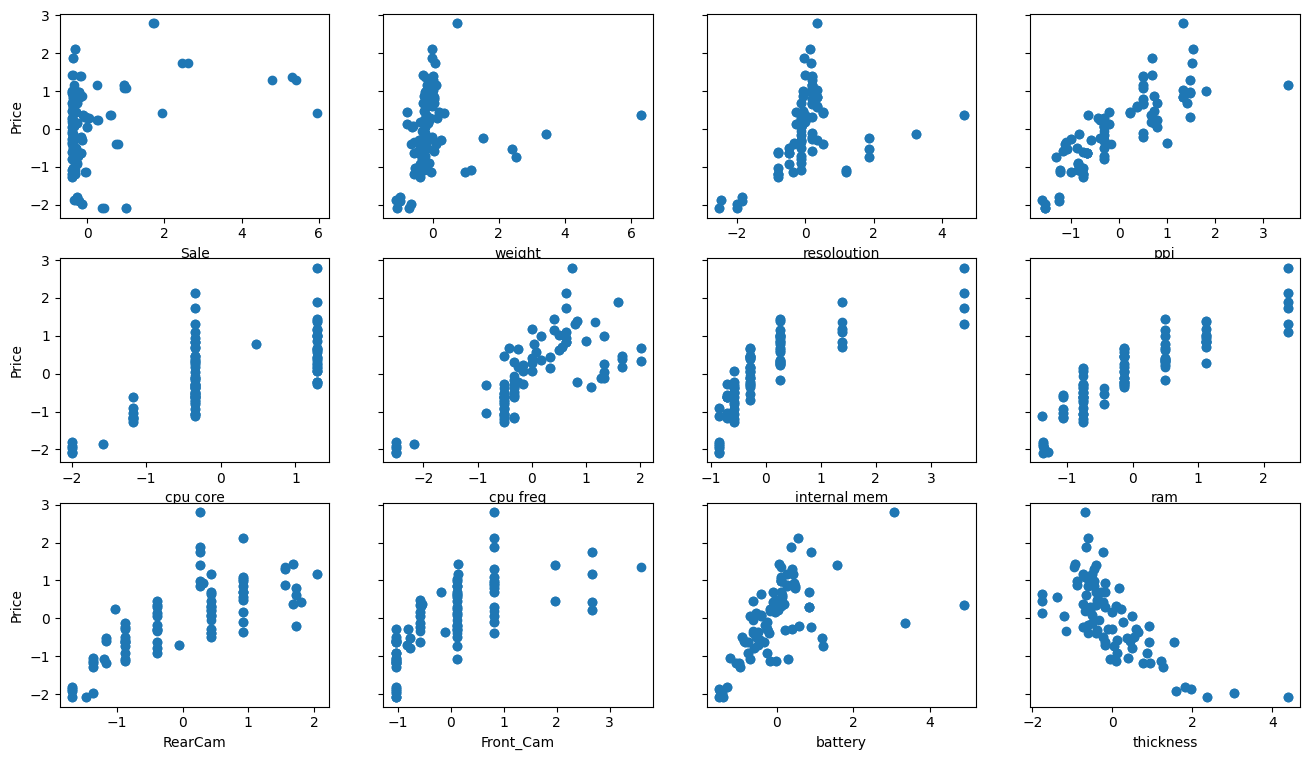

In [48]:
Y_norm, _, _ = zscore_normalization(actual_y)
fig,ax = plt.subplots(3, 4, figsize=(16, 9), sharey=True)
c = 0
for i in range(3):
    for j in range(4):
        feature = features_x[c]
        ax[i][j].scatter(X_norm[:, c], Y_norm)
        ax[i][j].set_xlabel(feature)
        c += 1
ax[0][0].set_ylabel("Price")
ax[1][0].set_ylabel("Price")
ax[2][0].set_ylabel("Price")
plt.show()